# Virtual Competition 18_06_2023

Import the necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Read the train and test data into the notebook.

In [2]:
train = pd.read_csv(r"C:\Users\ALFRED\Downloads\train_ctrUa4K.csv")
test = pd.read_csv(r"C:\Users\ALFRED\Downloads\test_lAUu6dG.csv")

Go through the basic details of the dataset

In [3]:
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape

(614, 13)

In [6]:
test.shape

(367, 12)

In [7]:
train.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [8]:
test.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area'],
      dtype='object')

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [10]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


 We are exploring about the target variable first

In [11]:
train['Loan_Status'].value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

In [12]:
train['Loan_Status'].value_counts(normalize = True)

Y    0.687296
N    0.312704
Name: Loan_Status, dtype: float64

<Axes: >

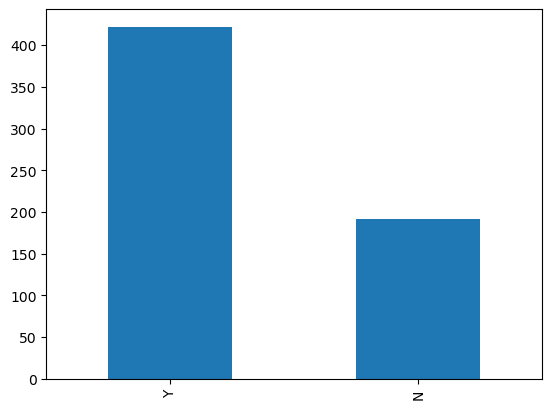

In [13]:
train['Loan_Status'].value_counts().plot.bar()

Almost 69% of the people recieved the loans

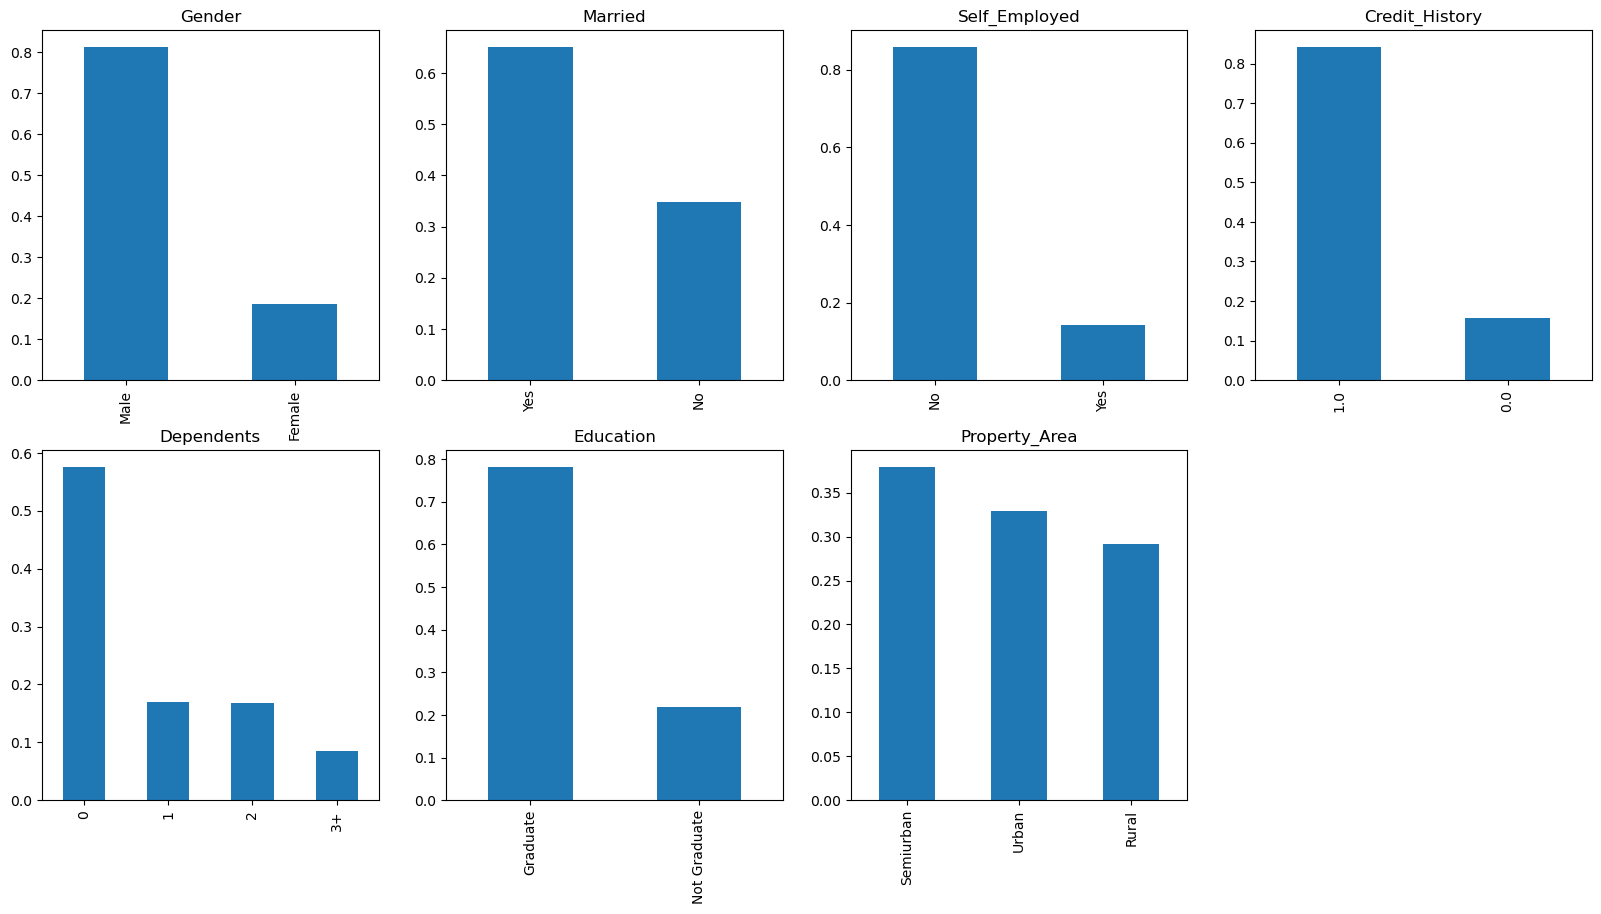

In [14]:
plt.figure(1)
plt.subplot(241)
train['Gender'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Gender')
plt.subplot(242)
train['Married'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Married')
plt.subplot(243)
train['Self_Employed'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Self_Employed')
plt.subplot(244)
train['Credit_History'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Credit_History')
plt.subplot(245)
train['Dependents'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Dependents')
plt.subplot(246)
train['Education'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Education')
plt.subplot(247)
train['Property_Area'].value_counts(normalize = True).plot.bar(figsize=(20,10),title = 'Property_Area')

plt.show()

While analysing the features, we can say that almost 80% of the people are males, nearly 80% people are graduates, more than 55% of people have nobody dependent on them while a 10% has 3 or more people dependent on them. We can also see that out of all the people almost 65% are married and 85% of people have a good credit history. Most people are from the semi urban area followed by urban and rural areas and almost 85% of the people are self employed


C:\Users\ALFRED\AppData\Local\Temp\ipykernel_536\3755591453.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['ApplicantIncome']);
C:\Users\ALFRED\AppData\Local\Temp\ipykernel_536\3755591453.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['CoapplicantIncome']);
C:\Users\ALFRED\

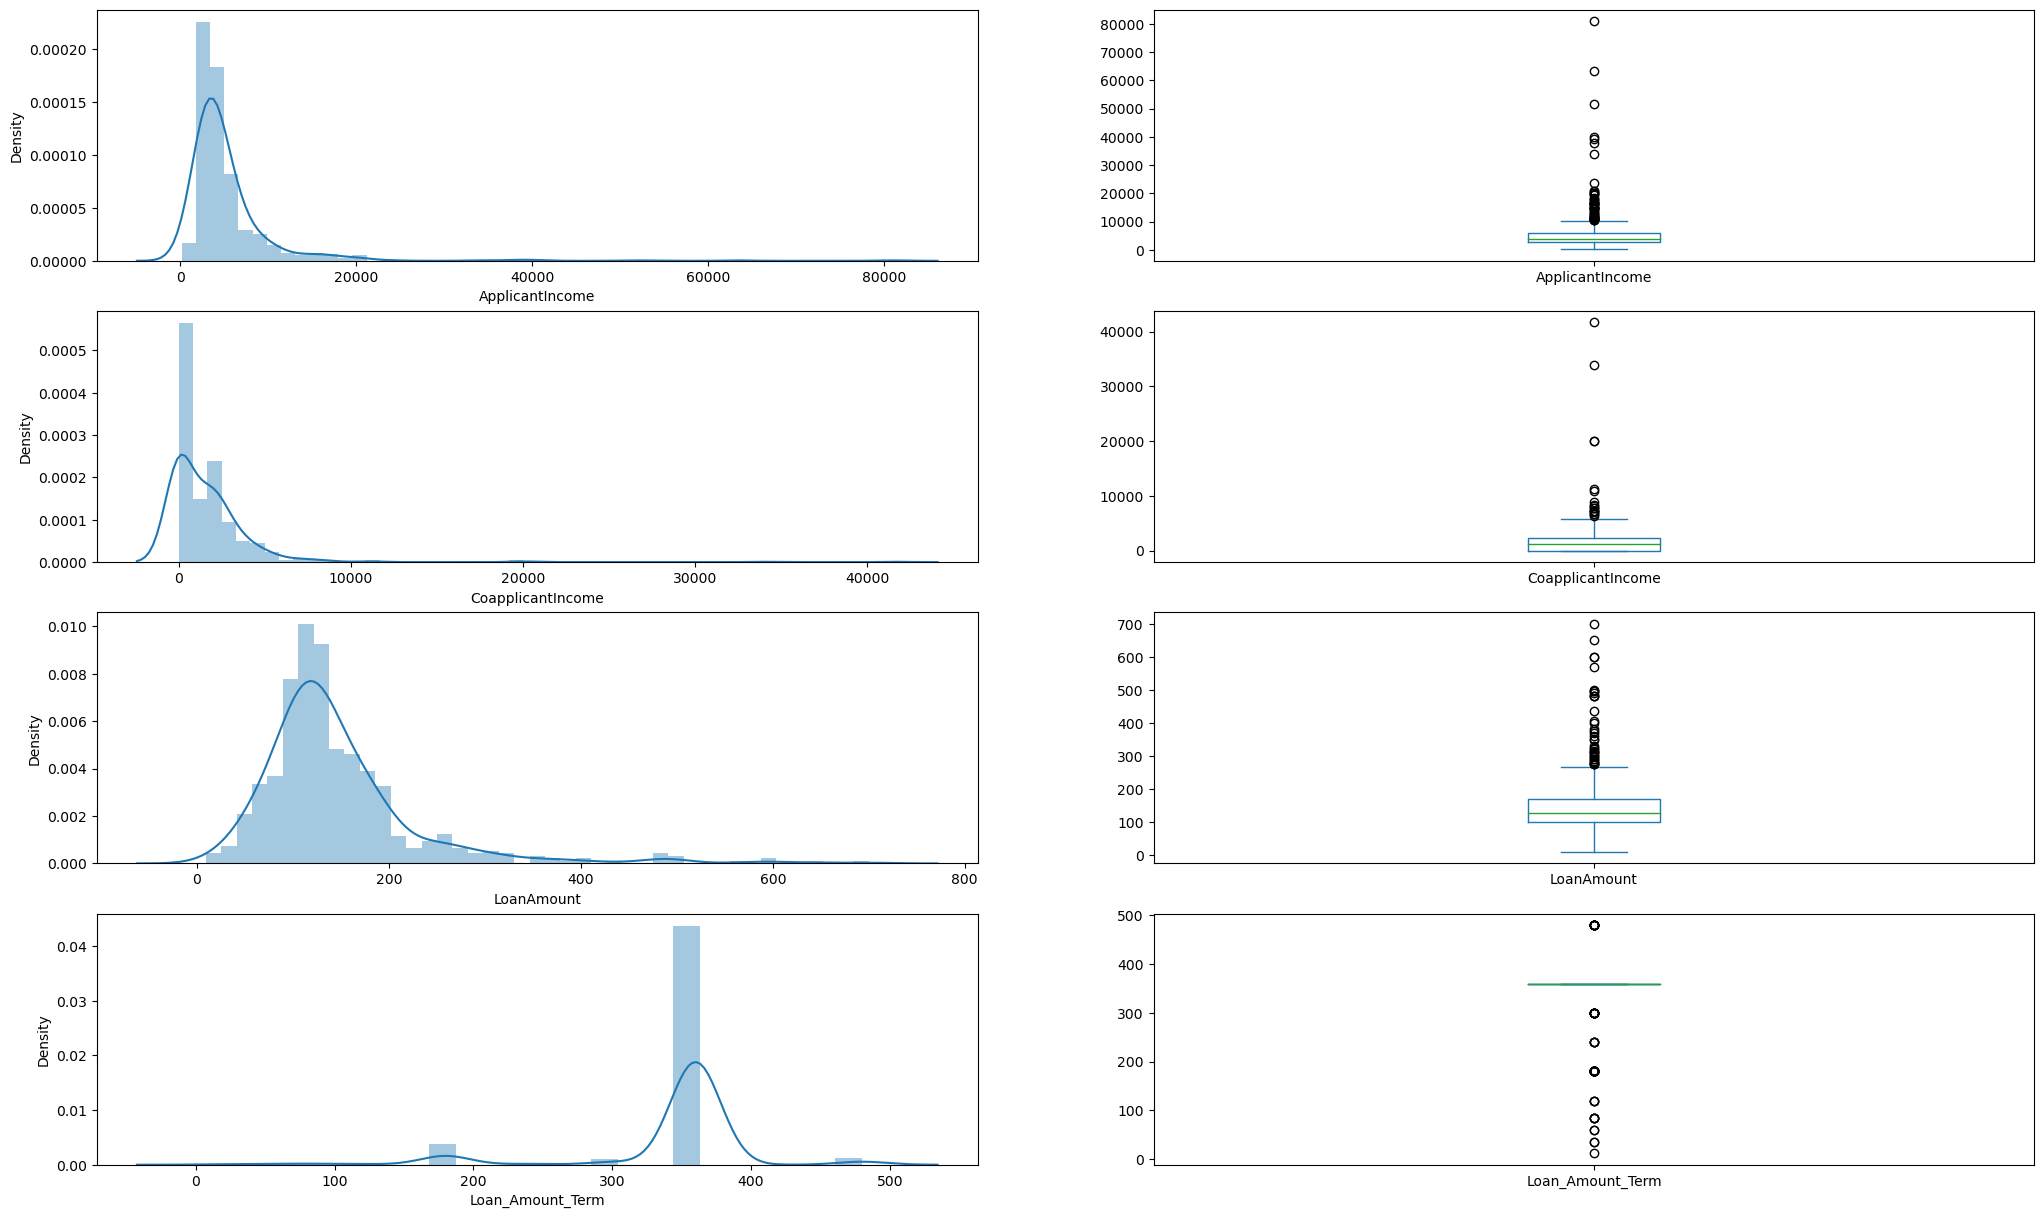

In [15]:
plt.figure(1)
plt.subplot(421)
sns.distplot(train['ApplicantIncome']);
plt.subplot(422)
train['ApplicantIncome'].plot.box(figsize = (25,15))
plt.subplot(423)
sns.distplot(train['CoapplicantIncome']);
plt.subplot(424)
train['CoapplicantIncome'].plot.box(figsize = (25,15))
plt.subplot(425)
sns.distplot(train['LoanAmount']);
plt.subplot(426)
train['LoanAmount'].plot.box(figsize = (25,15))
plt.subplot(427)
sns.distplot(train['Loan_Amount_Term']);
plt.subplot(428)
train['Loan_Amount_Term'].plot.box(figsize = (25,15))

plt.show()

Here the income features shows the difference in earnings which can be due to the difference in educational qualifications. Loan amount shows a skewed distribution whereas loan amount terms have very few unique values.  

Missing value handling

In [16]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

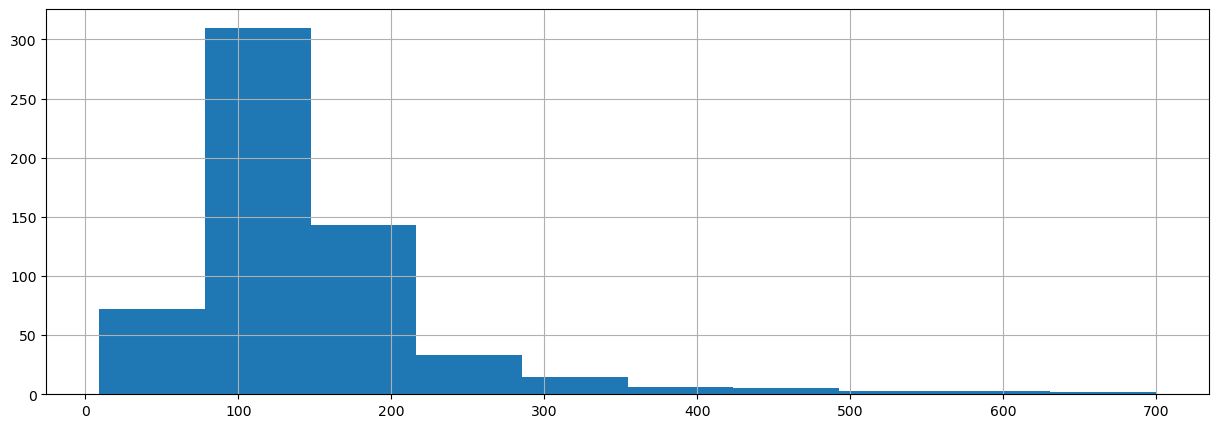

In [17]:
freqgraph = train['LoanAmount']
freqgraph.hist(figsize = (15,5))
plt.show()

In [18]:
train['Loan_Amount_Term'].value_counts()

360.0    512
180.0     44
480.0     15
300.0     13
240.0      4
84.0       4
120.0      3
60.0       2
36.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [19]:
train['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

We are going to fill in the missing values. All the categorical columns are filled in with the mode. Eventhough Loan_Amount_Term and Credit_History are numerical columns, we fill in with the mode because of very less number of unique values. Only LoanAmount is the numerical column filled in with median as the frequency graph is skewed.

In [20]:
train['Gender'].fillna(train['Gender'].mode()[0], inplace = True)
train['Married'].fillna(train['Married'].mode()[0], inplace = True)
train['Dependents'].fillna(train['Dependents'].mode()[0], inplace = True)
train['Self_Employed'].fillna(train['Self_Employed'].mode()[0], inplace = True)
train['Loan_Amount_Term'].fillna(train['Loan_Amount_Term'].mode()[0], inplace = True)
train['Credit_History'].fillna(train['Credit_History'].mode()[0], inplace = True)

In [21]:
train['LoanAmount'].fillna(train['LoanAmount'].median(), inplace = True)

In [22]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [23]:
test.isna().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

Since missing values in test is similar to that of train, we use the similar strategy.

In [24]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace = True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace = True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace = True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace = True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace = True)

In [25]:
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace = True)

In [26]:
test.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

Outlier Handling

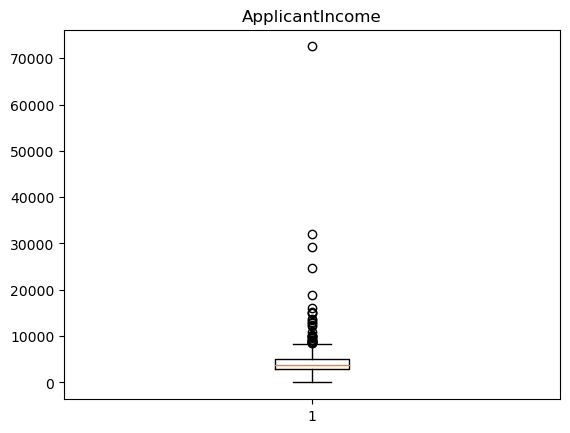

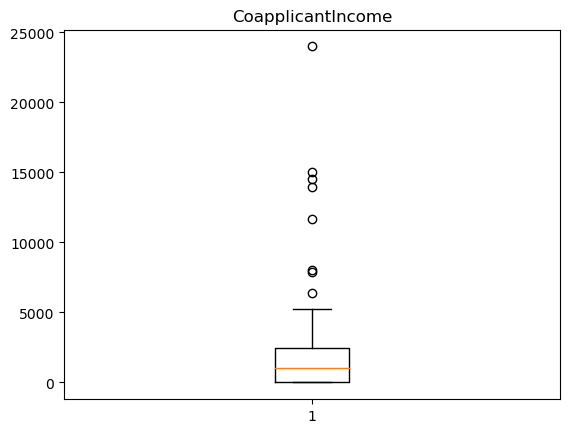

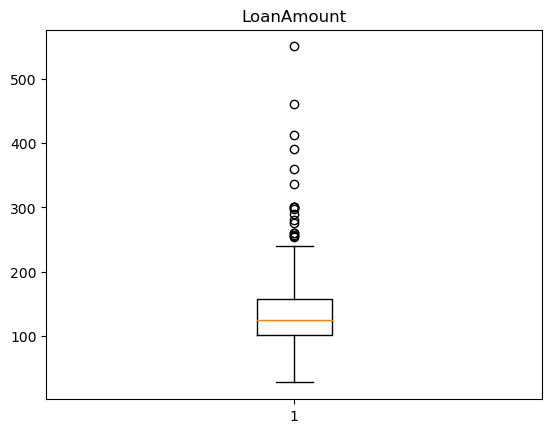

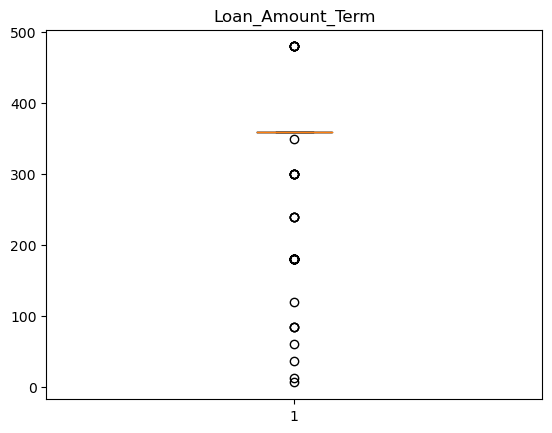

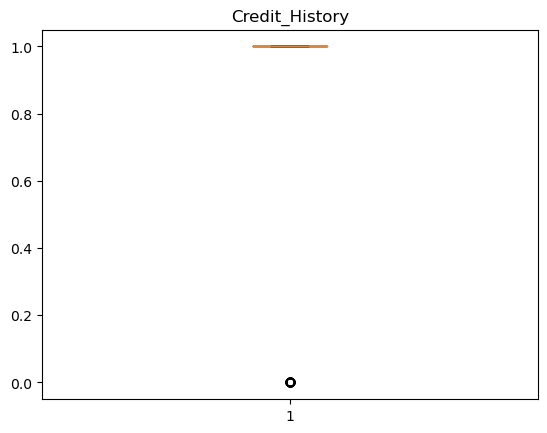

In [27]:
num_col = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount','Loan_Amount_Term', 'Credit_History']
for i in num_col:
    plt.figure()
    plt.boxplot(test[i])
    plt.title(i)

While looking at the outliers we can see that income columns may affect the results of the data if we did outlier handling. Since Loan_Amount_Term and Credit_History are columns with a minimum number of nonnull values we are leaving them as such. Now for LoanAmount column, we handle the outliers taking log function. We use similar approach in both test and train datas.

In [28]:
train['LoanAmount_log'] = np.log(train['LoanAmount'])
test['LoanAmount_log'] = np.log(test['LoanAmount'])

<Axes: >

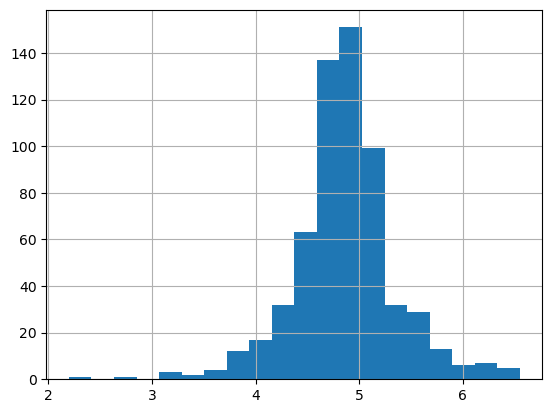

In [29]:
train['LoanAmount_log'].hist(bins = 20)

We got a graph close to normal distribution and the effect of normal values have been significantly subsided.

In [30]:
train['Loan_ID'].nunique()

614

In [31]:
test['Loan_ID'].nunique()

367

In [32]:
train = train.drop('Loan_ID', axis = 1) #Dropping Loan_ID from both test and train
test1 = test.drop('Loan_ID', axis = 1)

In [33]:
x = train.drop('Loan_Status', axis = 1) # Features
y = train['Loan_Status']                # Target

Now we do one hot encoding on test, train and x

In [34]:
train = pd.get_dummies(train)
test1 = pd.get_dummies(test1)
x = pd.get_dummies(x)

In [35]:
train.shape

(614, 23)

In [36]:
test1.shape

(367, 21)

In [37]:
x.shape

(614, 21)

In [38]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.2,random_state = 42)

Logistic Regression

In [39]:
from sklearn.linear_model import LogisticRegression
logit_model = LogisticRegression()
logit_model.fit(x_train, y_train)
y_pred_lr = logit_model.predict(x_test)

C:\Users\ALFRED\Anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [40]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy = ',accuracy_score(y_test,y_pred_lr))

Accuracy =  0.7642276422764228


In [41]:
confusion_matrix(y_test,y_pred_lr)

array([[16, 27],
       [ 2, 78]], dtype=int64)

In logistic regression, we got an accuracy of 76.4%

kNN

In [42]:
from sklearn.neighbors import KNeighborsClassifier
metric = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors = k, metric = 'minkowski',p=2)
    classifier.fit(x_train,y_train)
    y_pred_knn = classifier.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric.append(acc)

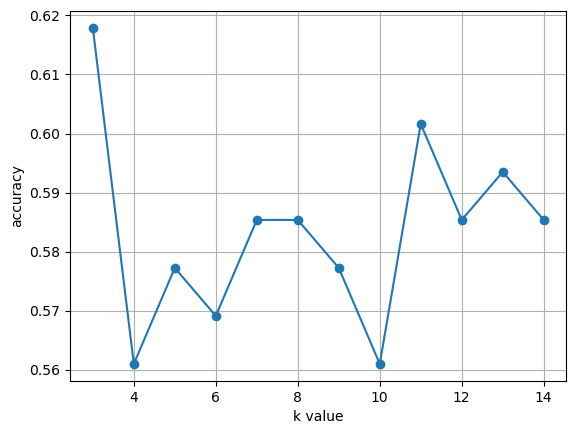

In [43]:
plt.plot(neighbors,metric,'o-')
plt.xlabel('k value')
plt.ylabel('accuracy')
plt.grid()

In [44]:
classifier = KNeighborsClassifier(n_neighbors = 2, metric = 'minkowski',p=2)
classifier.fit(x_train,y_train)
y_pred_knn = classifier.predict(x_test)

In [45]:
from sklearn.metrics import confusion_matrix,accuracy_score
print('Accuracy = ',accuracy_score(y_test,y_pred_knn))

Accuracy =  0.5528455284552846


In [46]:
confusion_matrix(y_test,y_pred_knn)

array([[21, 22],
       [33, 47]], dtype=int64)

In kNN, we got an accuracy of 55%

SVM

In [47]:
from sklearn.svm import SVC
svmclf = SVC(kernel = 'linear')
svmclf.fit(x_train,y_train)

SVC(kernel='linear')

In [48]:
y_pred = svmclf.predict(x_test)

In [49]:
from sklearn.metrics import accuracy_score, confusion_matrix
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  0.7723577235772358


In [50]:
confusion_matrix(y_test,y_pred)

array([[15, 28],
       [ 0, 80]], dtype=int64)

In SVM, the accuracy is 77%

In [51]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(x_train,y_train)
y_pred = dt_clf.predict(x_test)

In [52]:
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  0.6747967479674797


In [53]:
confusion_matrix(y_test,y_pred)

array([[22, 21],
       [19, 61]], dtype=int64)

In Decision tree, the accuracy is 67%

Random Forest Classifier

In [54]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier()
rf_clf.fit(x_train,y_train)

RandomForestClassifier()

In [55]:
y_pred = rf_clf.predict(x_test)

In [56]:
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  0.7723577235772358


In [57]:
confusion_matrix(y_test,y_pred)

array([[18, 25],
       [ 3, 77]], dtype=int64)

In [58]:
rf_clf1 = RandomForestClassifier(n_estimators = 10, max_depth = 100, criterion = 'entropy', min_samples_split = 3)
rf_clf1.fit(x_train, y_train)

RandomForestClassifier(criterion='entropy', max_depth=100, min_samples_split=3,
                       n_estimators=10)

In [59]:
y_pred = rf_clf1.predict(x_test)

In [60]:
print('Accuracy = ', accuracy_score(y_test,y_pred))

Accuracy =  0.7235772357723578


In [61]:
confusion_matrix(y_test,y_pred)

array([[21, 22],
       [12, 68]], dtype=int64)

In Random Forest Classifier, the accuracy before increasing the maximum depth is 77% and when increased to 100 it becomes 72%.

So, we can say that the random forest classifier and svm has the same maximum accuracy for this model. We can use either one of these to predict the test data. Let us choose SVM

We will use it to make predictions for the test dataset

In [65]:
pred_test = svmclf.predict(test1)

In [66]:
submission = pd.read_csv(r"C:\Users\ALFRED\Downloads\sample_submission_49d68Cx.csv")

In [68]:
submission['Loan_Status'] = pred_test
submission['Loan_ID'] = test['Loan_ID']

In [69]:
submission['Loan_Status'].replace(0, 'N', inplace = True)
submission['Loan_Status'].replace(1, 'Y', inplace = True)

In [71]:
Output = pd.DataFrame(submission, columns = ['Loan_ID','Loan_Status']).to_csv('SVM.csv')

In [72]:
submission.to_csv(r'C:\Users\ALFRED\Downloads\Output.csv', index = False)